# Research on apartment sales ads

I'll work with the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. I'll show how to determine the market value of real estate properties. My task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water.

### Step 1. Open the data file and study the general information. 

Load libraries and data file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
data = pd.read_csv('/datasets/real_estate_data_us.csv')
data.head()

,date_posted\tdays_listed\tlast_price\tbedrooms\tkitchen_area\tliving_area\ttotal_area\tbalconies\tceiling_height\tfloors_total\tfloor\ttotal_images\tbike_parking\tis_studio\tis_open_plan\tlocality_name\tairport_dist\tcity_center_dist\tpark_dist\tparks_within_3000\tpond_dist\tponds_within_3000
0,2019-03-07T00:00:00\t\t260000.0\t3\t25.0\t51.0...
1,2018-12-04T00:00:00\t81.0\t67000.0\t1\t11.0\t1...
2,2015-08-20T00:00:00\t558.0\t103920.0\t2\t8.3\t...
3,2015-07-24T00:00:00\t424.0\t1298000.0\t3\t\t\t...
4,2018-06-19T00:00:00\t121.0\t200000.0\t2\t41.0\...


After a first glance at the data, we see that all columns are stuck together at the one column.

### Conclusion

- The data was lumped into a single string instead of being neatly stored in different columns. 

- Before making the calculations and analysis, I'll separate columns.

### Step 2. Data preprocessing

I'll use the set='\t' character as the separator parameter to establish a symbol that would indicate the end of one column and the beginning of the next.

In [2]:
data = pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Looks much better for now. Now it is time to determine and study the missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

In [4]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


- The total number of rows = 23699. Even after a first glance at the info about the dataframe, we can see that not all the columns have 23699 rows.

- I will call the value_counts() method, which returns unique values and their counts, in order to determine how many rows are missing.

- I'll go row by row and fill in the missing values where appropriate.

- **days_listed** - I'm goint to use this parameter in the futher calculation, when I'll investigate the average time it usually takes to complete a sale. 

- In order to evaluate what pice of data is missed and decide if it is wize to replace it, I'll calculate the number of nulls in days_listed.

In [5]:
data[data['days_listed'].isnull()].count()

date_posted          3181
days_listed             0
last_price           3181
bedrooms             3181
kitchen_area         2978
living_area          2983
total_area           3181
balconies            1071
ceiling_height       2453
floors_total         3172
floor                3181
total_images         3181
bike_parking          275
is_studio            3181
is_open_plan         3181
locality_name        3180
airport_dist         2314
city_center_dist     2315
park_dist            1145
parks_within_3000    2316
pond_dist            1216
ponds_within_3000    2316
dtype: int64

More than 13% of the data in days_listed is missed. What could be a reason? Is it an error or those apartments simply aren't sold yet? As days_listed a parameter that calculates automatically, when the property is sold, I'll assume that those apartments weren't sold. Let's keep those nulls in the table.

Cheking number of 0's in column bedrooms

In [6]:
data['bedrooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: bedrooms, dtype: int64

Cheking if there're any patternt, why these data missed

In [7]:
data.query('bedrooms == 0')

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
144,2017-03-30T00:00:00,181.0,49000.0,0,NaN,15.50,27.00,2.0,NaN,24.0,...,NaN,True,False,Murino village,NaN,NaN,NaN,NaN,NaN,NaN
349,2017-09-27T00:00:00,45.0,46400.0,0,NaN,17.00,25.00,0.0,NaN,14.0,...,NaN,False,True,Kudrovo village,NaN,NaN,NaN,NaN,NaN,NaN
440,2018-03-12T00:00:00,64.0,49600.0,0,NaN,24.75,27.11,2.0,NaN,17.0,...,NaN,True,False,Saint Petersburg,38171.0,15015.0,NaN,0.0,982.0,2.0
508,2017-03-28T00:00:00,430.0,67500.0,0,NaN,24.30,34.40,1.0,NaN,26.0,...,NaN,False,True,Pargolovo village,53115.0,19292.0,NaN,0.0,593.0,1.0
608,2019-02-20T00:00:00,29.0,37000.0,0,NaN,NaN,25.00,NaN,NaN,10.0,...,NaN,True,False,Shushary village,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,2017-09-01T00:00:00,14.0,64000.0,0,NaN,18.00,26.00,0.0,NaN,25.0,...,NaN,True,False,Saint Petersburg,11405.0,13222.0,NaN,0.0,623.0,1.0
23442,2017-09-28T00:00:00,4.0,50000.0,0,NaN,18.00,27.70,2.0,NaN,24.0,...,NaN,False,True,Murino village,NaN,NaN,NaN,NaN,NaN,NaN
23554,2018-09-07T00:00:00,31.0,67000.0,0,NaN,NaN,26.00,NaN,NaN,19.0,...,NaN,True,False,Saint Petersburg,18090.0,17092.0,NaN,0.0,112.0,2.0
23592,2017-11-11T00:00:00,82.0,29000.0,0,NaN,18.00,29.00,2.0,NaN,9.0,...,NaN,False,True,Nikolskoye,NaN,NaN,NaN,NaN,NaN,NaN


I've checked that apartments with value 0 in column bedroom have living_area > kitchen_area. It means that they have another room. And 0's looks like an error. I'll replace 0's with 1 bedroom.

In [8]:
data=data.replace({'bedrooms': {0: 1}})
data['bedrooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: bedrooms, dtype: int64

10% of data in column kitchen_area is missed.

Cheking number of 0's in column living_area

In [9]:
data[data['living_area'].isnull()].count()

date_posted          1903
days_listed          1705
last_price           1903
bedrooms             1903
kitchen_area          439
living_area             0
total_area           1903
balconies             498
ceiling_height        797
floors_total         1870
floor                1903
total_images         1903
bike_parking          120
is_studio            1903
is_open_plan         1903
locality_name        1898
airport_dist         1278
city_center_dist     1280
park_dist             577
parks_within_3000    1280
pond_dist             695
ponds_within_3000    1280
dtype: int64

Cheking number of 0's in column floors_total

In [10]:
data[data['floors_total'].isnull()].count()

date_posted          86
days_listed          77
last_price           86
bedrooms             86
kitchen_area         39
living_area          53
total_area           86
balconies            47
ceiling_height        9
floors_total          0
floor                86
total_images         86
bike_parking          0
is_studio            86
is_open_plan         86
locality_name        85
airport_dist         76
city_center_dist     76
park_dist            34
parks_within_3000    76
pond_dist            49
ponds_within_3000    76
dtype: int64

In [11]:
data[data['city_center_dist'].isnull()].count()

date_posted          5519
days_listed          4653
last_price           5519
bedrooms             5519
kitchen_area         4804
living_area          4896
total_area           5519
balconies            2809
ceiling_height       2944
floors_total         5509
floor                5519
total_images         5519
bike_parking          628
is_studio            5519
is_open_plan         5519
locality_name        5511
airport_dist            1
city_center_dist        0
park_dist               1
parks_within_3000       1
pond_dist               0
ponds_within_3000       1
dtype: int64

In [12]:
data[data['ceiling_height'].isnull()].count()

date_posted          9195
days_listed          8467
last_price           9195
bedrooms             9195
kitchen_area         7857
living_area          8089
total_area           9195
balconies            4923
ceiling_height          0
floors_total         9118
floor                9195
total_images         9195
bike_parking          913
is_studio            9195
is_open_plan         9195
locality_name        9160
airport_dist         6617
city_center_dist     6620
park_dist            2785
parks_within_3000    6620
pond_dist            3378
ponds_within_3000    6620
dtype: int64

- In case with a floor total, I shouldn't use neither mean, nor median, because they can be lower then current floor where apartmet located. I'll leave the floor data as it is now.

- For other values, In order to decide with what value (mean or median) replace the missing values, I'll calculate both of them and compare.

In [13]:
median_ceiling = data['ceiling_height'].median()
mean_ceiling = data['ceiling_height'].mean()
print(median_ceiling)
print(mean_ceiling)

2.65
2.77149889685604


In [14]:
median_city_center_dist = data['city_center_dist'].median()
mean_city_center_dist = data['city_center_dist'].mean()
print(median_city_center_dist)
print(mean_city_center_dist)

13098.5
14191.277832783278


In [15]:
median_living_area = data['living_area'].median()
mean_living_area = data['living_area'].mean()
print(median_living_area)
print(mean_living_area)

30.0
34.457852427601395


- There're no big gap in the range between mean and median for the parameters above.

- It means that there're no outliers in those values. 

- In this case, there's no a big difference, what value to use in order to replace missing values.
- I'll replace missing values with median ones.

In [16]:
data[['ceiling_height','city_center_dist']] = data[['ceiling_height','city_center_dist']] \
    .fillna(data[['ceiling_height','city_center_dist']].median())

There're also missed data in locality_name. Let's check how many rows affected and if it is worth to keep them.

In [17]:
data[data['locality_name'].isnull()]

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
1097,2016-04-15T00:00:00,147.0,172000.0,3,8.80,50.80,81.70,0.0,3.55,5.0,...,NaN,False,False,NaN,23478.0,4258.0,NaN,0.0,NaN,0.0
2033,2017-05-30T00:00:00,34.0,107960.0,3,18.60,42.60,80.00,0.0,2.65,4.0,...,NaN,False,False,NaN,NaN,13098.5,NaN,NaN,NaN,NaN
2603,2015-09-20T00:00:00,276.0,67035.0,1,10.70,15.60,42.70,0.0,2.65,24.0,...,NaN,False,False,NaN,22041.0,17369.0,NaN,0.0,374.0,1.0
2632,2015-10-11T00:00:00,256.0,102612.0,2,8.20,33.10,62.40,0.0,2.65,24.0,...,NaN,False,False,NaN,22041.0,17369.0,NaN,0.0,374.0,1.0
3574,2016-05-28T00:00:00,45.0,84000.0,2,6.50,30.80,46.50,0.0,2.65,5.0,...,NaN,False,False,NaN,27419.0,8127.0,NaN,0.0,603.0,1.0
4151,2014-12-09T00:00:00,869.0,352000.0,2,13.38,39.62,89.50,0.0,3.00,8.0,...,NaN,False,False,NaN,25054.0,3902.0,485.0,1.0,722.0,3.0
4189,2015-12-10T00:00:00,223.0,184000.0,3,10.40,52.30,80.00,0.0,4.00,4.0,...,False,False,False,NaN,21774.0,3039.0,690.0,1.0,953.0,1.0
4670,2015-08-14T00:00:00,350.0,110000.0,3,NaN,NaN,83.00,0.0,2.65,7.0,...,NaN,False,False,NaN,26534.0,5382.0,446.0,1.0,376.0,1.0
5343,2016-01-20T00:00:00,303.0,270800.0,3,8.30,59.10,85.50,4.0,2.65,7.0,...,False,False,False,NaN,10556.0,9538.0,67.0,1.0,NaN,0.0
5707,2016-04-29T00:00:00,49.0,74000.0,1,NaN,20.00,30.00,0.0,2.65,24.0,...,NaN,False,False,NaN,21460.0,16788.0,NaN,0.0,170.0,1.0


I'll keep those rows and replace NaNs with "Undefined"

In [18]:
data['locality_name'] = data['locality_name'].fillna(value='Undefined')

Next step is to replace missing values in "living_area".

As total area consist of 2 parts: living_area and kitchen_area, I'll calculate the missund data in living_area, using simple calculation:

living_area = total_area - kitchen_area

In [19]:
living_area_calc = data['total_area'] - data['kitchen_area'].median()
data['living_area'] = data['living_area'].fillna(value=living_area_calc)

In [20]:
#Cheking if any nulls remain.
data[data['living_area'].isnull()].count()

date_posted          0
days_listed          0
last_price           0
bedrooms             0
kitchen_area         0
living_area          0
total_area           0
balconies            0
ceiling_height       0
floors_total         0
floor                0
total_images         0
bike_parking         0
is_studio            0
is_open_plan         0
locality_name        0
airport_dist         0
city_center_dist     0
park_dist            0
parks_within_3000    0
pond_dist            0
ponds_within_3000    0
dtype: int64

Now I'll do the same nulls substitution, but for the rows, where kitchen_area is missed.

In [21]:
kitchen_area_calc = data['total_area'] - data['living_area']
data['kitchen_area'] = data['kitchen_area'].fillna(value=kitchen_area_calc)
data[data['kitchen_area'].isnull()].count()

date_posted          0
days_listed          0
last_price           0
bedrooms             0
kitchen_area         0
living_area          0
total_area           0
balconies            0
ceiling_height       0
floors_total         0
floor                0
total_images         0
bike_parking         0
is_studio            0
is_open_plan         0
locality_name        0
airport_dist         0
city_center_dist     0
park_dist            0
parks_within_3000    0
pond_dist            0
ponds_within_3000    0
dtype: int64

I'll not replace nulls in such columns as:

-  balconies          
-  bike_parking       
-  airport_dist       
-  city_center_dist   
-  park_dist          
-  parks_within_3000  
-  pond_dist          
-  ponds_within_3000

There're couple reasons for this:

1. The data may be missed because, the property simply don't have those features, like balkonies, nearest parks or ponds.

2. For our feature analysis this data is not essential, so it can be ignored.

In [22]:
data['balconies'] = data['balconies'].fillna(value=0)

In some columns  data types have to be changed:

- date_posted from object to date
- last_price from float to int
- balconies from float to int
- living_area from float to int
- total_area from float to int
- kitchen_area from float to int
- floors_total from float to int
- bike_parking from object to bool

In [23]:
data['date_posted']= pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')
data['bike_parking'] = data['bike_parking'].astype('bool')
data[['last_price', 'balconies', 'living_area', 'total_area', 'kitchen_area']] = data[['last_price', 'balconies', 'living_area', 'total_area', 'kitchen_area']].astype('int')


# info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          20518 non-null float64
last_price           23699 non-null int64
bedrooms             23699 non-null int64
kitchen_area         23699 non-null int64
living_area          23699 non-null int64
total_area           23699 non-null int64
balconies            23699 non-null int64
ceiling_height       23699 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23699 non-null object
airport_dist         18157 non-null float64
city_center_dist     23699 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 non-n

Check dublicates

In [24]:
data.duplicated().sum()

0

### Step 3. Make calculations and add them to the table

**1. The price per square meter**

In [25]:
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,NaN,260000,3,25,51,108,0,2.70,16.0,...,True,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04,81.0,67000,1,11,18,40,2,2.65,11.0,...,True,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20,558.0,103920,2,8,34,56,0,2.65,5.0,...,True,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24,424.0,1298000,3,9,149,159,0,2.65,14.0,...,True,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19,121.0,200000,2,41,32,100,0,3.03,14.0,...,True,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


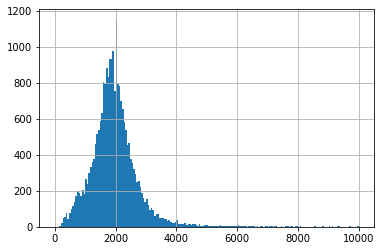

In [26]:
data['price_sq_m'] = data['last_price'] / data['total_area']
#print out hist to check if there any outliers
data['price_sq_m'].hist(bins='auto', range=(0, 10000))

We have few outliers in price_sq_m ranging after 4000 USD and up to 10000 USD.

I'll check outliers also by analizing last_price

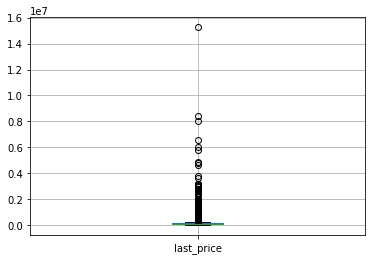

In [27]:
boxplot = data.boxplot(column=['last_price'])

What % od data contains outliers

In [28]:
print(len(data.query('last_price > 400000')) / len(data))

0.02983248238322292


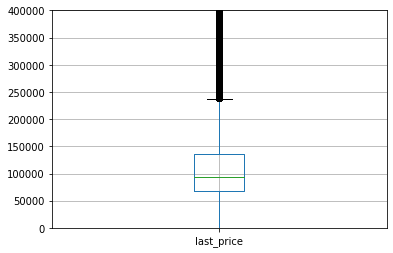

In [29]:
#mean values
plt.ylim(0, 400000)
boxplot = data.boxplot(column=['last_price'])

The outliers in price lie within following values: last_price > 400K or price_sq_m > 4000.

**2.The day of the week, month, and year that the ad was published.**

I'll find the day of the week, month and year by using the dt.weekday, dt.month, dt.year method. 

For day of week: Monday is day 0, Sunday is day 6.

In [30]:
data['weekday'] = data['date_posted'].dt.weekday
data['month'] = data['date_posted'].dt.month
data['year'] = data['date_posted'].dt.year

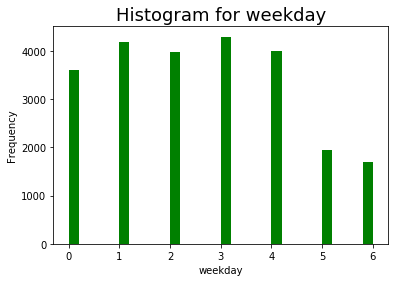

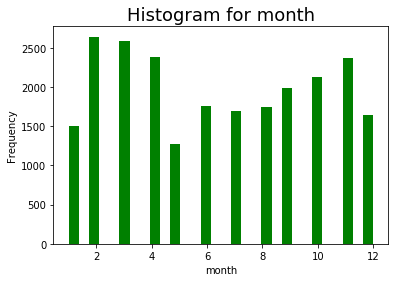

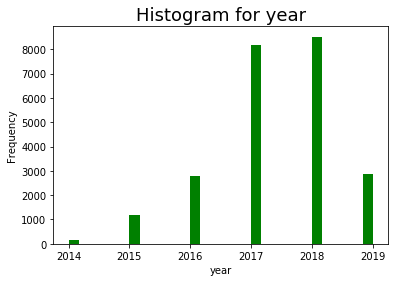

In [31]:
published = data[['weekday','month', 'year']]
for i, col in enumerate(published.columns):
    n, bins, patches = plt.hist(published[col], 30, facecolor='green')
    plt.gca().set(xlabel= published.columns[i], ylabel='Frequency')
    plt.title("Histogram for " + published.columns[i], fontsize=18)
    plt.show()

The most popular days for adds publications: Tuesday to Thursday. It could be because most of the ads are published by real estate agencies and these days coincide with their workweek.

The most popular months are: Feb, Mar, Apr, Oct, Nov. This could be because in winter utilities, such as heating costs more and people more tend to sell their property when it comes to economic expediency. Also in the summertime, it is harder to sell a property due to the vacation season, which leads to slow deals closing.

**3.Which floor the apartment is on (first, last, or other)**

Check if there're no any strange numbers if floor column

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Floors')]

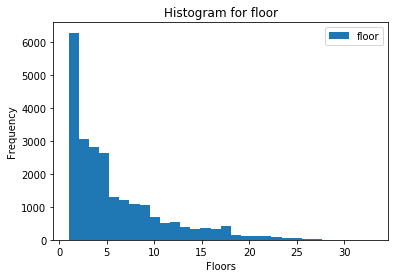

In [32]:
ax_floor = data.plot(y='floor', title='Histogram for floor', kind='hist', bins=30)
ax_floor.set(xlabel='Floors', ylabel='Frequency')

In [33]:
# Create categorization by floor
def floor_category (row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor > 1 and floor < floors_total:
        return 'other'

    if floor == floors_total:
        return 'last'

    if floor == 1:
        return 'first'

    return 'Undefined'

data['floor_category'] = data.apply(floor_category, axis=1)
data['floor_category'].value_counts()

other        17363
last          3361
first         2892
Undefined       83
Name: floor_category, dtype: int64

**4.The ratio between the living space and the total area, as well as between the kitchen space and the total area**

In [34]:
data['ratio_living_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

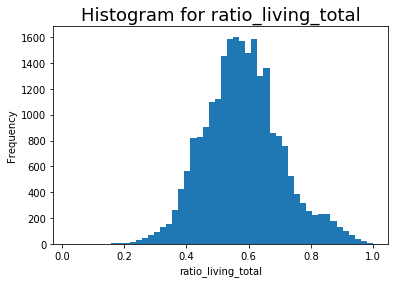

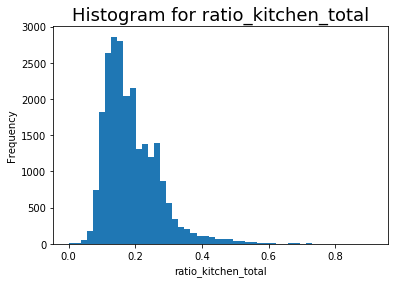

In [35]:
ratio = data[['ratio_living_total','ratio_kitchen_total']]
for i, col in enumerate(ratio.columns):
    n, bins, patches = plt.hist(ratio[col], 50)
    plt.gca().set(xlabel= ratio.columns[i], ylabel='Frequency')
    plt.title("Histogram for " + ratio.columns[i], fontsize=18)
    plt.show()

In general distribution looks normal. No any suspitious values or outliers.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

**Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.**

Histograms for the main parameters

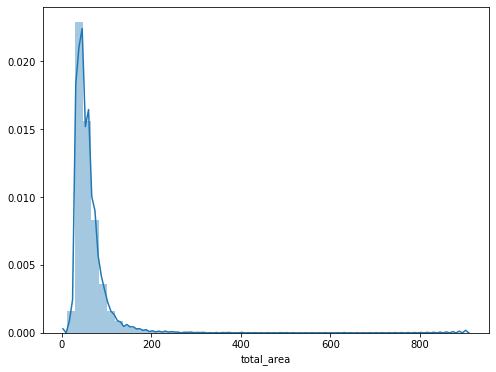

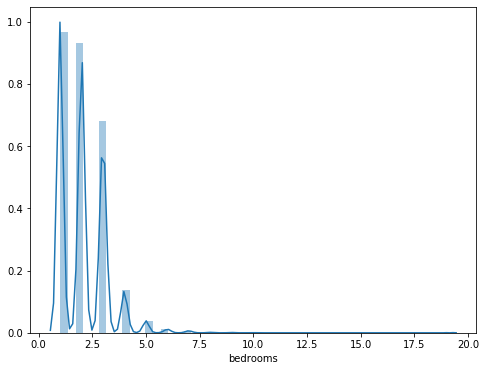

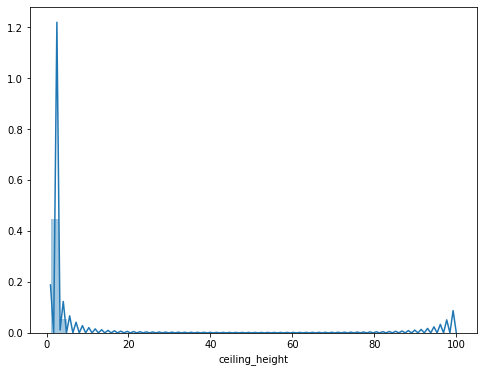

In [36]:
main = data[['total_area','bedrooms', 'ceiling_height']]
for i, col in enumerate(main.columns):
    plt.figure(i, figsize=(8,6))
    sb.distplot(main[col])

- There're some outliers in total_area: apartments bigger than 130 sq m up to 400 sq m. 
- This type of hudge apartments have all changes to exists in real live, but they are very rare. For the futher analysis I'll exclude those extra big apartments.

- I'll investigate how the last price correlate with a total_area.

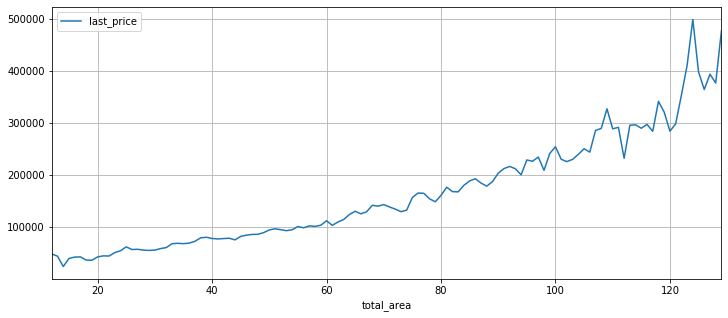

In [37]:
price_area = (data.query('total_area < 130') \
              .pivot_table(index='total_area', values='last_price', aggfunc='mean') \
              .plot(grid=True, figsize=(12, 5)))

- Price and total sq m have positive correlation – the value of price increases with respect to sq m.

- Hist for column bedrooms also shows some outliers. But do I really need to get rid of them? I'll keep them for now and see how they affect the stat.

- I'll investigate how the last price correlate with a number of bedrooms.

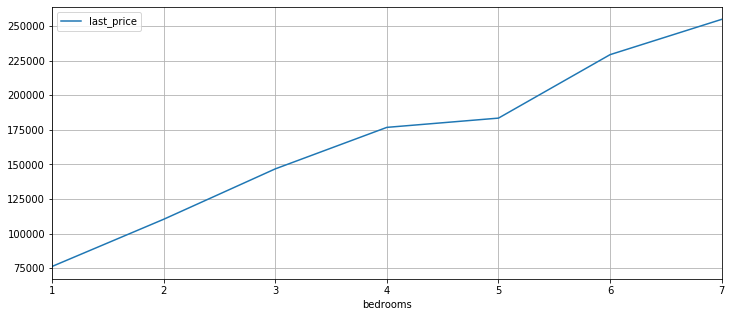

In [38]:
price_area = (data.query('total_area < 130') \
              .pivot_table(index='bedrooms', values='last_price', aggfunc='mean') \
              .plot(grid=True, figsize=(12, 5)))

- Price and number of bedrooms have positive correlation too.

- There's definatly outliers in ceiling_height. I'll exclude apartments with following condition: 2 < ceiling_height < 10.
- First (less than 2m) cannot exist, because a person of average height cannot fit in them.

- The other (more than 10m) may exist, but they are very rare, as can be seen from the graph above.

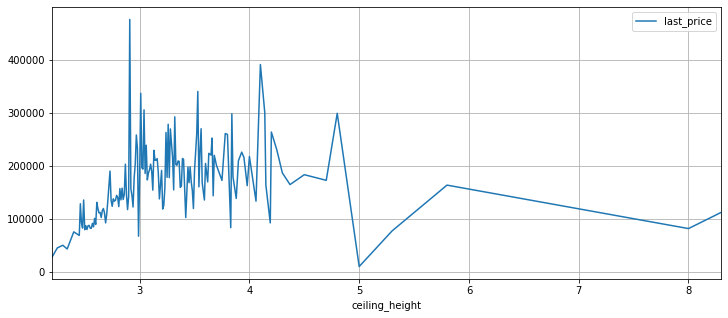

In [39]:
price_area = (data.query(' total_area < 130 and 2 < ceiling_height < 10') \
              .pivot_table(index='ceiling_height', values='last_price', aggfunc='mean') \
              .plot(grid=True, figsize=(12, 5)))

From the graph, I can make a conclusion: the price has a positive correlation to ceiling height until its value reaches 3m. After that (height > 3 m) prices for apartments are not affected by this parameter.

- **Examine the time it's taken to sell the apartment and plot a histogram.**

- **Calculate the mean and median and explain the average time it usually takes to complete a sale.**

- **When can a sale be considered to have happened rather quickly or taken an extra long time?**

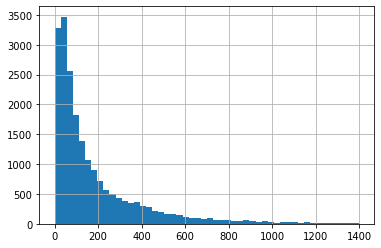

In [40]:
data['days_listed'].hist(bins=50, range=(0, 1400))

In [41]:
print('Mean: ', data['days_listed'].mean())
print( 'Median:', data['days_listed'].median())

Mean:  180.88863436982163
Median: 95.0


- The mean and median values differ a lot. It means that data contains outliers.

- The distribution of days_listed has a long tail of hight values that shift the average up, without affecting the median.

- I'll remove rare and outlying values.

- Adds postings that last 600 days are rare. According to graph, almost nobody sells longer than 600 days, and at around 1,400 days, the histogram merges with zero.

- Let’s set a maximum days for advertising limit of 600 days. This number seems adequate since it’s very uncommon that anyone takes any longer. We won’t lose much data by dropping the values over 600.

- I also see an extra short period of adds listings - 1 day. I suppose this could or en error or customer decided to dismiss his add in a short term after posting.

- Is it possible that the sales proposition was so profitable, that customer bought an apartment without any due diligence?

How many rows will we lose if we dispose of those suspiciously short and slow sales? Let’s calculate the share.

In [42]:
print(len(data.query('days_listed < 7')) / len(data))
print(len(data.query('days_listed > 600')) / len(data))

0.025908266171568422
0.05055065614582894


Check what kind of property falls for extra short adds listings

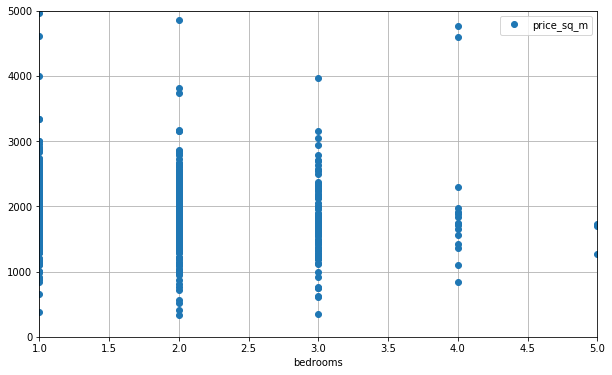

In [43]:
sample = data.query('days_listed < 7' )
sample.plot(x='bedrooms', y='price_sq_m', style='o', ylim=(0, 5000), grid=True, figsize=(10, 6))

- I see that the most 'hot property', which people are eager to buy for less than one week it is a 1-3 bedroom apartments with a price in the range 200 - 3000 per sq m.

- I consider them outliers and I'll exclude extra short adds listing - all that a less than 1 week.

- From now let’s continue working with days_listed that satisfy the condition: data.query(' < 7 days_listed < 600').

filter excessively fast and slow sales and outliners in total_area

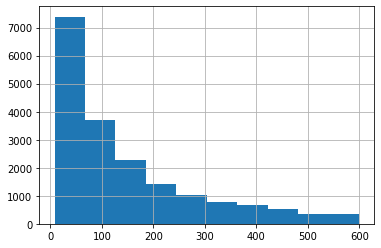

In [44]:
good_data = data.query(' 7 < days_listed < 600')
good_data['days_listed'].hist()

In [45]:
good_data['days_listed'].mean()

145.2317522200563

For the period 2014 - 2019, the average time of apartment sales = 145 days or almost 5 months.

I'll drill down to the detailed data and check the drill down by each year.

In [46]:
year_pivot = good_data.pivot_table(index='year', values='days_listed', aggfunc = {'count', 'mean'})
year_pivot

,count,mean
year,,
2014,28,578.464286
2015,595,396.531092
2016,2256,230.841312
2017,7507,155.246969
2018,7158,99.341995
2019,924,35.389610


- Every year, the selling period is decreasing and decreasing.
It could be because the technology is improved. Targeted advertising and customization works just fine and potential customers spend less time, searching for relevant offers.

- Or the second reason it could be because more and more new offers appear on the market: the number of adds also increases together with a number of sales.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5006589250>,
      dtype=object)

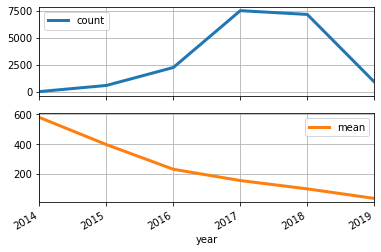

In [47]:
year_pivot.plot(subplots=True, linewidth=3, grid=True, legend=True)

There's a drop on the first graph with a number of ads by years at 2019 poit, but it is only because the archive of property contains data till May 2019.

- **Which factors have had the biggest influence on an apartment’s price?**

- **Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area.**

- **Check whether the publication date has any effect on the price: specifically, day of the week, month, and year.**

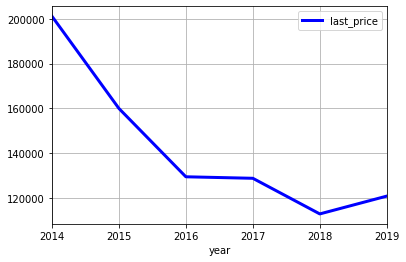

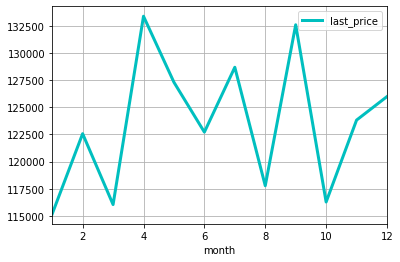

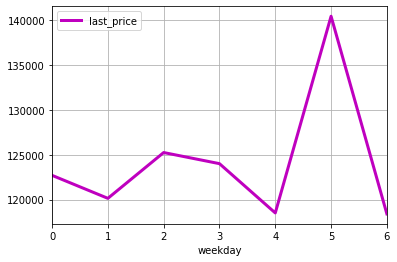

In [48]:
good_data.pivot_table(index='year', values='last_price', aggfunc = 'mean').plot(color='b', linewidth=3, grid=True)
good_data.pivot_table(index='month', values='last_price', aggfunc = 'mean').plot(color='c', linewidth=3, grid=True)
good_data.pivot_table(index='weekday', values='last_price', aggfunc = 'mean').plot(color='m', linewidth=3, grid=True)

***1. On the 1-st graph, we see a drop in prices starting from 2015Y. Does it mean that suddenly property in Russia turned out to be cheaper?***

- The reason is that price data archived in USD currency and not in RUB. When in 2015 happened inflation and RUB dropped from 30 to 70 - 80 per USD (information about FX rated taken from oanda.com), the prices fixed in RUB also dropped.
The thing is the prices for properties are depend on RUB/USD FX rates and national currency inflation has a high impact on the last_price.

***2. On the 2-nd graph is an interesting trend. From the first glans, it looks like a cardiogram, which means season time highly affects property price:***


- In winter the prices are lower due to the low-demand period, since nobody wants to deal with the inconvenience of moving during this cold time.

- Buyers and sellers with children typically do not want to uproot their families in the middle of the school year and will wait for a fresh start once the next school year begins. The graph shown the busiest moving times starts in April and last till July.

- August is the less busy month due to vacation period. If somebody urgently wants to sell his property in august he/she will have to consider seriously cutting the price.

- In September agents and customers are tend to close all the deals which were "frozen" during vacation period plus opening new deals.

***3. The 3-rd graph shows that sellers put their houses up for sale around the holidays is the most hight price.***

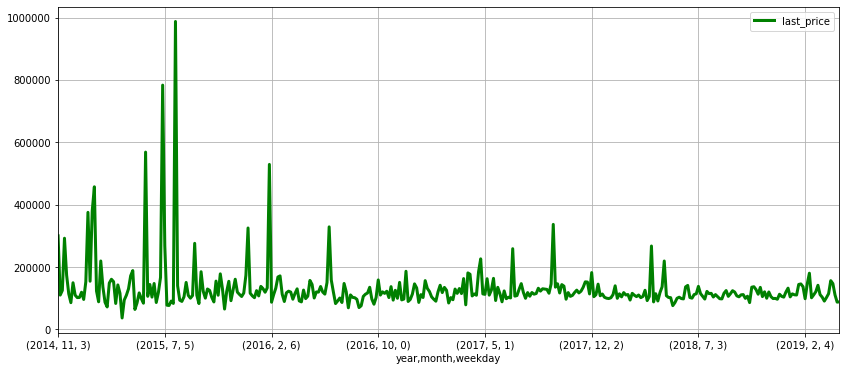

In [49]:
year_price_pivot = good_data.pivot_table(index=['year', 'month', 'weekday'], values='last_price', aggfunc = 'mean') 
year_price_pivot.plot(color='g', linewidth=3, grid=True, figsize=(14, 6))

According to the graph, sellers in summer 2015 had the most provitable deals.

- **Examine whether the apartment’s price depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area.**

I'll create a new data slice "good_data_2", excluding all found outliers.

dependency apartment’s price on the total square area

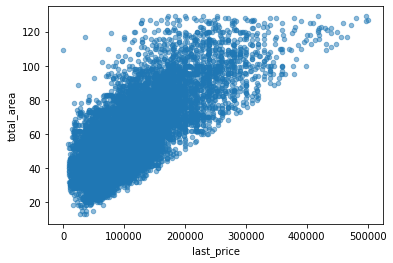

In [50]:
good_data_2 = data.query(' 7 < days_listed < 600 and total_area < 130 and 2 < ceiling_height < 10 and price_sq_m < 4000')
good_data_2.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5)

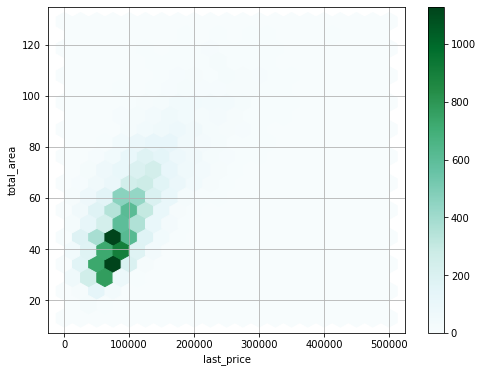

In [51]:
#hexbin scatter plot
good_data_2.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

- We see the direct correlation between price and total_area. On the scatter plot: the bigger total_area, the higher price.

Dependency apartment’s price on number of rooms

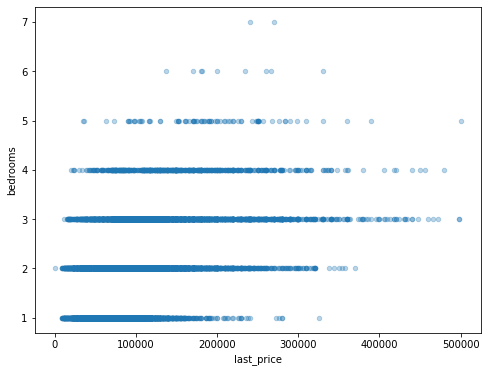

In [52]:
good_data_2.plot(x='last_price', y='bedrooms', kind='scatter', alpha=0.3, figsize=(8,6))

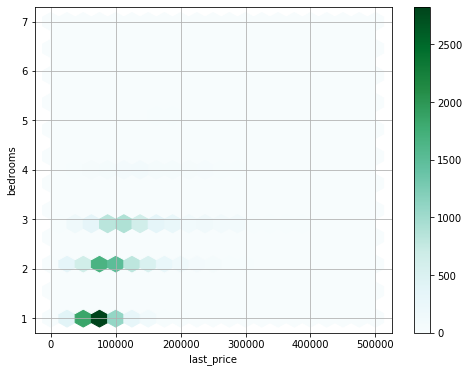

In [53]:
#hexbin scatter plot
good_data_2.plot(x='last_price', y='bedrooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [54]:
good_data_2.pivot_table(index='bedrooms', values='last_price', aggfunc={'count', 'mean'})

,count,mean
bedrooms,,
1,6696.0,73736.307497
2,6150.0,102083.337561
3,4105.0,134495.714738
4,640.0,159536.587500
5,81.0,190441.975309
6,9.0,217877.777778
7,2.0,254900.000000


- The graph shows that price depends on number of rooms.

- The most demanded apartments with 1-2 bedrooms.

Dependency apartment’s price on floor

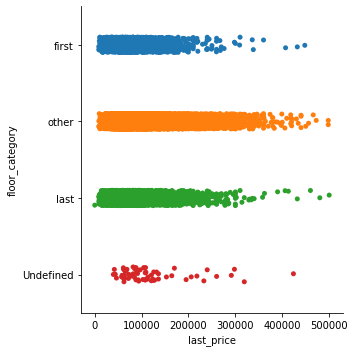

In [55]:
sb.catplot(x='last_price', y='floor_category', data=good_data_2)

- According to the graph, buyers tend to choose a property on the middle floors, which means "not first and not last" and they agree to pay more for "other" floors. 
- Together with this, last floors are a bit more popular than first ones and could be valued at higher prices.

Dependency apartment’s price on city center distance

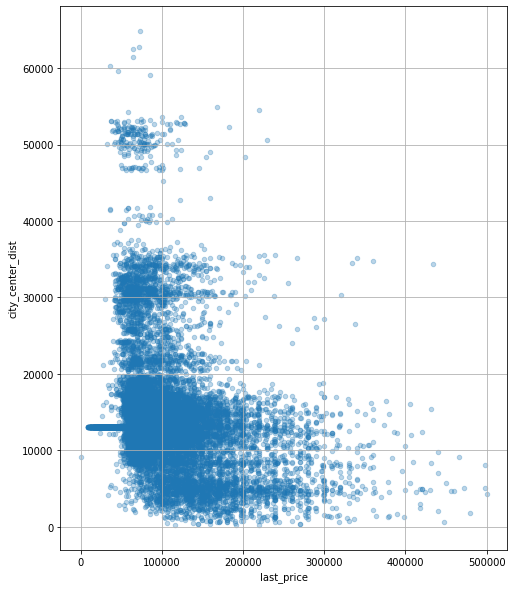

In [56]:
good_data_2.plot(x='last_price', y='city_center_dist', kind='scatter', alpha=0.3, grid=True, figsize=(8,10))

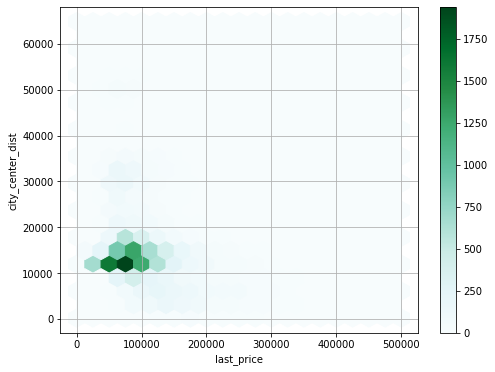

In [57]:
good_data_2.plot(x='last_price', y='city_center_dist', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

- The apartments in range 0-10 km to city center - the most popular and on x-axis we see that price for them could reach 500K.

- The apartments in range 11-20 km to city center - are also popular, but price for them reaches its limit at 420K.

- The apartments in range 20 km to city center - are less popular and average price for them stays within 70-80K.

- **Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities.**

- **Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.**

In [58]:
largest_num_ads = good_data_2.groupby('locality_name')['date_posted'].count().sort_values(ascending=False).head(10)
largest_num_ads

locality_name
Saint Petersburg     11470
Murino village         501
Shushary village       382
Vsevolozhsk            307
Kolpino                283
Pargolovo village      275
Kudrovo village        265
Pushkin                260
Gatchina               233
Vyborg                 188
Name: date_posted, dtype: int64

In [59]:
#average price per square meter
lagest_locations = good_data_2.query('locality_name in @largest_num_ads.index')
average_price = lagest_locations.pivot_table(index='locality_name', values='price_sq_m').sort_values(by='price_sq_m', ascending=False)
average_price.columns = ['average price per sq m']
average_price

,average price per sq m
locality_name,
Saint Petersburg,2131.989730
Pushkin,2010.714881
Kudrovo village,1862.860542
Pargolovo village,1788.889642
Murino village,1730.481564
Shushary village,1568.511184
Kolpino,1495.506528
Gatchina,1370.099351
Vsevolozhsk,1345.810885


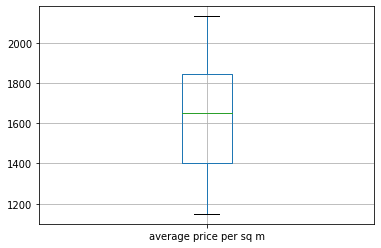

In [60]:
average_price.boxplot(figsize=(6,4))

In [61]:
average_price.mean()

average price per sq m    1645.401692
dtype: float64

From the top-10 locations by number of ads, the highest average price per sq m has Saint Petersburg: 2132 USD and the lowest Vyborg: 1149 USD.

The average price per sq m for top-10 locations: 1645 USD.

**Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be in the city center. 
In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. 
Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center.
Find a place on the graph where it shifts significantly. That's the city center border.**

In [62]:
data['city_center_dist_km'] = (data['city_center_dist'] / 1000).round()

In [63]:
St_Petersburg = data.query('locality_name == "Saint Petersburg"')
St_Petersburg_pivot = St_Petersburg.pivot_table(index='city_center_dist_km', values='price_sq_m')
St_Petersburg_pivot.head(10)

,price_sq_m
city_center_dist_km,
0.0,4928.449303
1.0,3546.706399
2.0,3164.519792
3.0,2434.896595
4.0,2674.411076
5.0,2819.097360
6.0,3029.742779
7.0,3134.554773
8.0,2523.414551


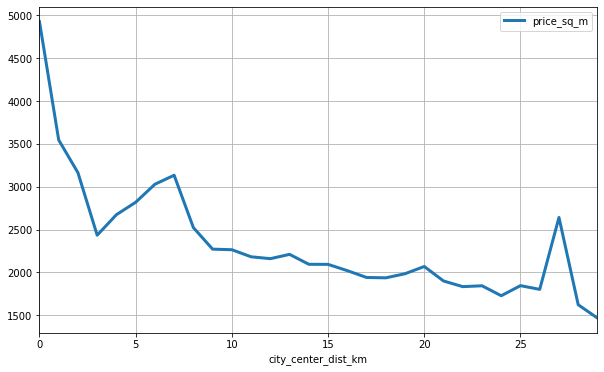

In [64]:
St_Petersburg_pivot.plot(linewidth=3, grid=True, figsize=(10,6))

When the trend reaches 7km its drop became flatter. It means that area within 0 - 7km considered by buyers and sellers as the city center.

**Select all the apartments in the city center and examine correlations between the following parameters:**

- number of rooms,

- total area, 

- ceiling height,

- price. 

In [65]:
#Select only those rows, which meet the condition to be in city center
center_data = data.query('city_center_dist_km <= 7')

In [66]:
#I'll combine 2 tables using merge() method
#Now I can work only with good data which meets the city center condition
good_center_data = good_data_2.merge(center_data, how='inner')
good_center_data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,parks_within_3000,pond_dist,ponds_within_3000,price_sq_m,weekday,month,year,ratio_living_total,ratio_kitchen_total,city_center_dist_km
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1986.000000,1989.000000,...,1989.000000,1440.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,165.986425,166126.811966,2.443439,11.921569,42.963298,70.215686,0.300654,2.877682,7.044814,4.062846,...,0.958270,484.237500,1.274510,2409.937525,2.522373,6.684766,2017.192056,0.599844,0.180612,4.591252
std,146.028350,67994.360969,1.021619,6.031931,19.535403,24.525584,0.718472,0.328405,3.907044,2.908146,...,0.902026,268.935253,1.076575,587.371122,1.732088,3.394675,0.907335,0.131045,0.085869,1.643640
min,8.000000,33720.000000,1.000000,1.000000,2.000000,13.000000,0.000000,2.400000,2.000000,1.000000,...,0.000000,22.000000,0.000000,307.692308,0.000000,1.000000,2014.000000,0.038462,0.009804,0.000000
25%,57.000000,118000.000000,2.000000,8.000000,28.000000,50.000000,0.000000,2.650000,5.000000,2.000000,...,0.000000,251.000000,0.000000,1958.762887,1.000000,4.000000,2017.000000,0.520833,0.121951,4.000000
50%,113.000000,152000.000000,2.000000,10.000000,41.000000,68.000000,0.000000,2.700000,5.000000,3.000000,...,1.000000,480.000000,1.000000,2322.580645,3.000000,7.000000,2017.000000,0.600000,0.156863,5.000000
75%,243.000000,199800.000000,3.000000,14.000000,55.000000,87.000000,0.000000,3.000000,9.000000,5.000000,...,2.000000,686.000000,2.000000,2809.700000,4.000000,10.000000,2018.000000,0.674419,0.214286,6.000000
max,599.000000,500000.000000,7.000000,49.000000,115.000000,129.000000,5.000000,5.800000,25.000000,23.000000,...,3.000000,1199.000000,3.000000,3989.473684,6.000000,12.000000,2019.000000,0.990196,0.692308,7.000000


In [67]:
apartments_stat_center = good_center_data.pivot_table(index='date_posted', values=['total_area','last_price', 'bedrooms', 'ceiling_height'], aggfunc='mean')
apartments_stat_center.head()

,bedrooms,ceiling_height,last_price,total_area
date_posted,,,,
2014-12-09,4.0,2.65,254760.0,124.0
2014-12-11,3.0,2.65,199800.0,95.0
2014-12-15,4.0,3.00,180000.0,95.0
2015-01-05,1.0,2.80,126599.0,34.0
2015-01-16,4.0,2.65,126000.0,63.0


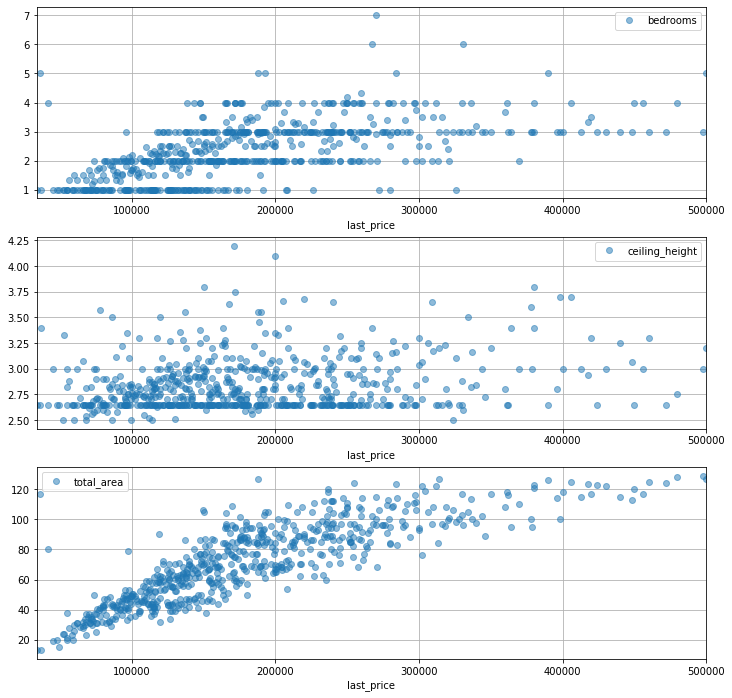

In [68]:
Center_pivot = good_center_data \
    .pivot_table(index='last_price', values=['total_area', 'bedrooms', 'ceiling_height'], aggfunc='mean') \
    .plot(subplots=True, linewidth=3, grid=True, alpha=0.5, figsize=(12, 12), style='o', sharex=False)

In [69]:
#Pearson correlation coefficient
apartments_stat_center.corr()

,bedrooms,ceiling_height,last_price,total_area
bedrooms,1.000000,0.158159,0.427294,0.775379
ceiling_height,0.158159,1.000000,0.119965,0.208345
last_price,0.427294,0.119965,1.000000,0.729950
total_area,0.775379,0.208345,0.729950,1.000000


Another method to build the scatter plots automatically for all values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5000865410>,
      dtype=object)

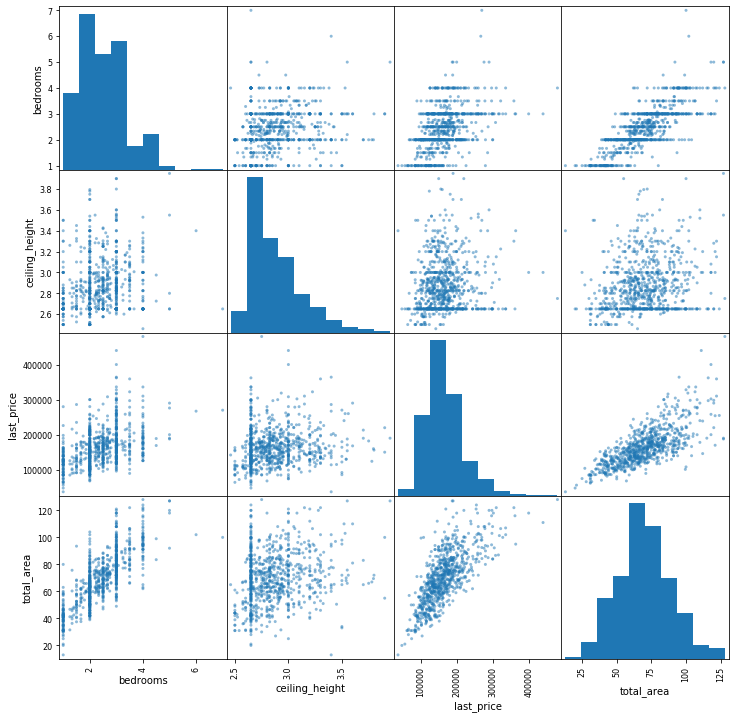

In [70]:
pd.plotting.scatter_matrix(apartments_stat_center, figsize=(12, 12))

**Identify the factors that affect an apartment’s price:**
- number of rooms, 
- floor, 
- distance to the city center, and 
- ad publication date. 

**Draw your conclusions. Are they different from the overall deductions about the entire city?**

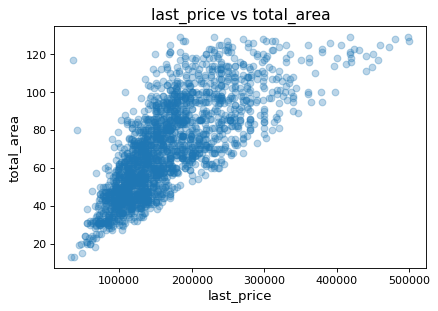

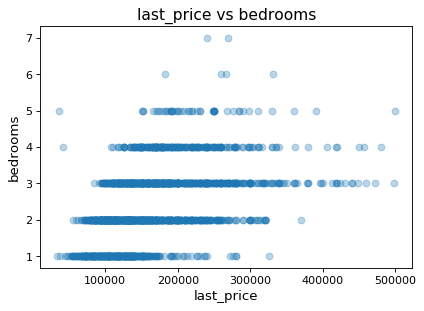

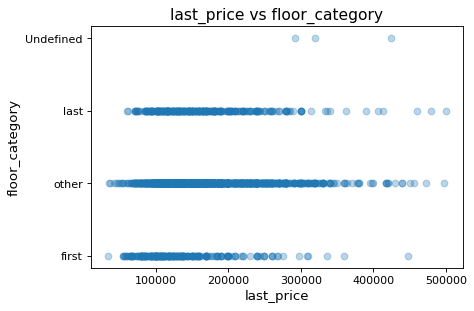

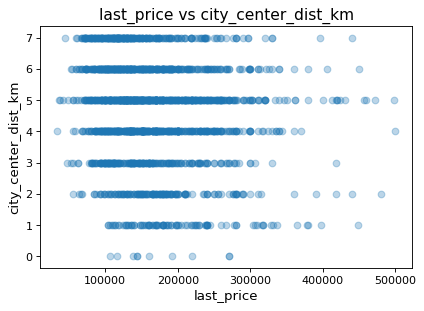

In [71]:
df1 = good_center_data[['last_price', 'total_area','bedrooms', 'floor_category', 'city_center_dist_km']]


x_col = "last_price"
y_columns = ['total_area', 'bedrooms', 'floor_category', 'city_center_dist_km']


for y_col in y_columns:

    figure = plt.figure(figsize=(6,4), dpi= 80)


    ax = plt.gca()
    ax.scatter(df1[x_col], df1[y_col], alpha=0.3)
    ax.set_xlabel(x_col, fontsize=12)
    ax.set_ylabel(y_col, fontsize=12)
    ax.set_title("{} vs {}".format(x_col, y_col), fontsize=14)

    plt.show()

Check whether the publication date has any effect on the price of apartment in city center

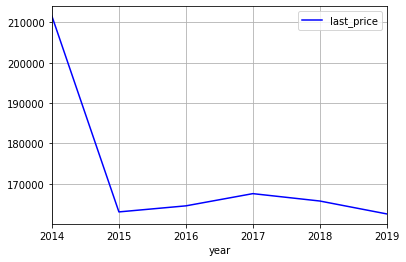

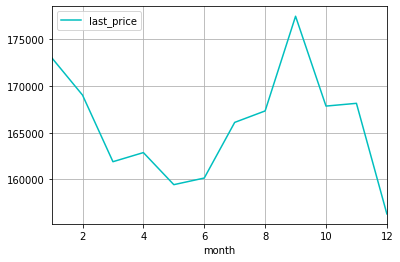

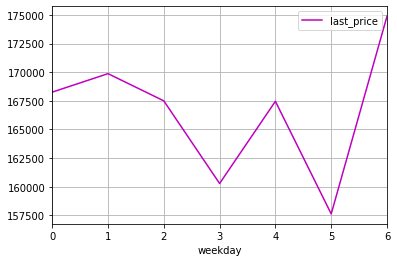

In [72]:
good_center_data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(color='b', grid=True)
good_center_data.pivot_table(index='month', values='last_price', aggfunc='mean').plot(color='c', grid=True)
good_center_data.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(color='m', grid=True)

According to the analysis above, the last price for the apartments in the city center depends (has direct correlation) on the same factors as for the apartments outside the city center: number of bedrooms, total_area, floor, ceiling_height. 

There're also some new findings, that have to be highlighted:
1. When it comes to distance to the city center, buyers are ready to pay more for the apartment 4-5km far from the city center, then 1-3km. The reason could be due to the fact that usually in the center lots of commercial real estate, shops, offices, and buyers prefer to choose a more quiet neighborhood, but still in the city center, which happened to be right within 4-5 km from the "center of business".

2. Despite the fact that yearly trend (price to year) for property only in the center and for all property pretty much the same, 2 other trends (monthly and weekday) have some differences. There're my thoughts why:

    2.1. When it comes to real estate in the center, it could be more popular and pricey for the period July-October for the same reasons as for other types of property but in addition, it becomes really demand full due to close distance to most of the educational establishments. Educational migration happens every year exactly in the period of July-October.
    
    2.2. City center property as all other property also has more chances to be published with higher prices on weekends. But there's a difference in what considered to be "weekends". If all property together has dropped on Friday and pick on Saturday, the "city center" property has picked on Friday, Sunday, and drop on Saturday.

At the end of the analysis, I'll create 2 heat maps of good data for **all adds** and good data **only for city_center adds**.
I want to compare the correrations between price and main parameters for those 2 dataframes.

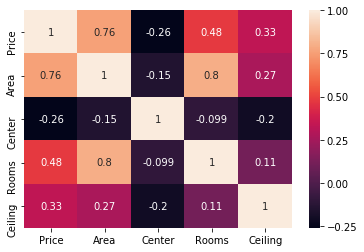

In [73]:
data_all = {'Price': good_data_2['last_price'], 'Area': good_data_2['total_area'], 'Center': good_data_2['city_center_dist'], 'Rooms': good_data_2['bedrooms'], 'Ceiling': good_data_2['ceiling_height']}
df_all = pd.DataFrame(data_all, columns=['Price', 'Area', 'Center', 'Rooms', 'Ceiling'])
corrMatrix = df_all.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

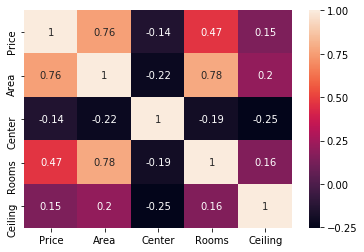

In [74]:
data_center = {'Price': good_center_data['last_price'], 'Area': good_center_data['total_area'], 'Center': good_center_data['city_center_dist'], 'Rooms': good_center_data['bedrooms'], 'Ceiling': good_center_data['ceiling_height']}
df_center = pd.DataFrame(data_center, columns=['Price', 'Area', 'Center', 'Rooms', 'Ceiling'])
corrMatrix = df_center.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

As was proven above: there's no big difference in correlation between main values as for all apartments, as for city center apartments.

### Step 5. Overall conclusion

The goal of the analysis was to determine the market value of real estate properties by to defining the main parameters.

According to the analysis, the price for real estate has direct correcation with following paramenters:

- **Total area**: corr coeff=0.76

- **Number of rooms**: corr coeff=0.48

- **Floor**: buyrs prefer apartments on the 'middle' floor. The prices for first and last floors are lower.

- **Distance to city center**. This has impact on the price until sertain limit. In our case it is 7km. After the limit the price trend is no longer affected so drammatically.

- **Ceiling_height**. This parameter also has it's limit = 3m. After the limit, the correlation dissapears.

- **Publication date**. The trend showes that prices for all houses droped after 2015Y. It could happen cause of FX RUB/USD drop. 
There's a correlation between year season and the price. The most profitable season for seller is starting July till October. The less profitable deals fall for winter period. Boths data slices: "all good data" and "center good data" showed price correlation with the publication date. During work week prices are lower than on weekeds.

### Project completion checklist

I mark the completed tasks with 'x' to check myself.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn